# Nick Wan Data Science Bootcamp Day #5

Notes and code from the fifth day of the Nick Wan data science bootcmap

## Import Data and Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/2023-nwbc-data.csv')
era_df = pd.read_csv('./data/era.csv')

print(df.shape)
print(df.shape)

(672545, 101)
(672545, 101)


## Review: Summary Statistics

Let's get some descriptive statistics on our new columns from the homework:

In [2]:
era_df.loc[:, ['fip', 'era', 'k9']].describe()

,fip,era,k9
count,632.000000,632.000000,632.000000
mean,3.647499,3.693438,6.821710
std,0.986905,1.345245,2.378792
min,1.000000,0.000000,0.000000
25%,2.983871,2.789156,5.435526
50%,3.577381,3.613715,6.950957
75%,4.128828,4.414468,8.417677
max,9.777778,9.000000,15.464789


You can also get specific statistics on individual columns, such as `mean()`, `median()`, `mode()`, `quantile()`, and more. 

You can also calculate a Pearson-R correlation coefficient with the `corr()` function, as seen below:

In [3]:
era_df.loc[:, ['fip', 'era', 'k9']].corr()

,fip,era,k9
fip,1.000000,0.570359,-0.422666
era,0.570359,1.000000,0.012890
k9,-0.422666,0.012890,1.000000


If $R^2$ is something that you want to share for your data, just slap an exponentiation onto your result:

In [4]:
era_df.loc[:, ['fip', 'era', 'k9']].corr()**2

,fip,era,k9
fip,1.000000,0.325309,0.178646
era,0.325309,1.000000,0.000166
k9,0.178646,0.000166,1.000000


Some businesses like to have deviations from 100 to help understand increases or decreases in values (i.e. just a way to normalize the data for stupid business people to understand). This is called a **plus metric**. Lets create an ERA plus metric:

In [5]:
era_df['era_plus'] = (era_df['era'] / era_df['era'].mean()) * 100
era_df.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,home_run,walk,fip,era_plus
0,"Abbott, Cory",676265,25,52,4.326923,45,7.788462,12,25,5.711538,117.151622
1,"Abreu, Albert",656061,12,51,2.117647,29,5.117647,1,11,2.764706,57.335382
2,"Abreu, Bryan",650556,26,81,2.888889,101,11.222222,2,30,1.938272,78.216787
3,"Acevedo, Domingo",642758,32,82,3.512195,58,6.365854,9,13,3.487805,95.092829
4,"Adam, Jason",592094,14,77,1.636364,77,9.000000,5,15,2.428571,44.304613


In [6]:
era_df['era_plus'].describe()

count    632.000000
mean     100.000000
std       36.422553
min        0.000000
25%       75.516510
50%       97.841486
75%      119.521900
max      243.675373
Name: era_plus, dtype: float64

We can visually describe our statistical distributions with histograms as well:

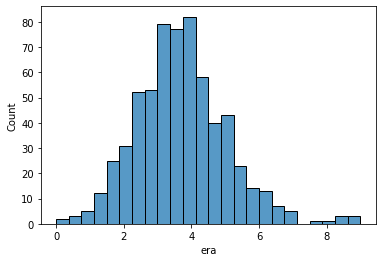

In [7]:
sns.histplot(era_df['era'])
plt.show()

## Diving Further Into Statistics

We are going to compute some other statistics using `scipy.stats`. We will also use the mean squared error from `scikit-learn`:

In [8]:
from scipy.stats import pearsonr, spearmanr, ttest_ind
from sklearn.metrics import mean_squared_error

It also is important that we know how to properly index information in Python and `pandas`, so let's do that now!

* Python is 0-indexed, so to get a specific value in any list start from 0 and count up
* If you want to index from the BACK, you can negative index. This would be 1 indexed, so the last element would be $-1$ and the second to last element would be $-2$ etc.
* To get a slice of information, do `[start:end]` but this will *include* `start` and *exclude* `end`

In [9]:
x = 'trevor'
print(x[0])
print(x[2])
print(x[-1])
print(x[2:4])

t
e
r
ev


Let's calculate the Pearson R value using our new package:

In [10]:
r = pearsonr(era_df['era'], era_df['fip'])

print('ALL R INFORMATION:', r)
print('R STATISTIC:', r[0])
print('P VALUE:', r[1])
print('R SQUARED VALUE:', r[0]**2)

ALL R INFORMATION: PearsonRResult(statistic=0.5703586023830288, pvalue=8.177069156221482e-56)
R STATISTIC: 0.5703586023830288
P VALUE: 8.177069156221482e-56
R SQUARED VALUE: 0.32530893531232197


It's definitely that easy for the non-parametric stats too :D

In [11]:
sr = spearmanr(era_df['era'], era_df['fip'])

print('ALL SPEARMAN R INFORMATION:', sr)
print('SPEARMAN R STATISTIC:', sr[0])
print('SPEARMAN P VALUE:', sr[1])
print('SPEARMAN R SQUARED VALUE:', sr[0]**2)

ALL SPEARMAN R INFORMATION: SignificanceResult(statistic=0.5516708095343142, pvalue=1.2995460922250619e-51)
SPEARMAN R STATISTIC: 0.5516708095343142
SPEARMAN P VALUE: 1.2995460922250619e-51
SPEARMAN R SQUARED VALUE: 0.30434068209224563


Again, run it back to the histograms to help with confirming your gut with these statistics.

By the way - you can layer plots on top of each other by just waiting to make the `plt.show()` call after making to `sns.histplot()` calls:

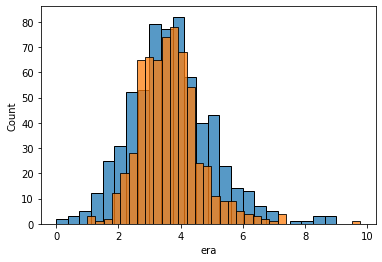

In [12]:
sns.histplot(era_df['era'])
sns.histplot(era_df['fip'])
plt.show()

We can also do t-tests - again incredibly easy too!

In [13]:
t = ttest_ind(era_df['era'], era_df['fip'])

print(f'ALL T-TEST INFORMATION BETWEEN ERA AND FIP: {t}')
print(f'T STATISTIC: {t[0]}')
print(f'P VALUE: {t[1]}')

ALL T-TEST INFORMATION BETWEEN ERA AND FIP: Ttest_indResult(statistic=0.6922148794504962, pvalue=0.4889297355691794)
T STATISTIC: 0.6922148794504962
P VALUE: 0.4889297355691794


So now we can include our statistics in our plots, WE ARE COOKING WITH GAS NOW CHAT:

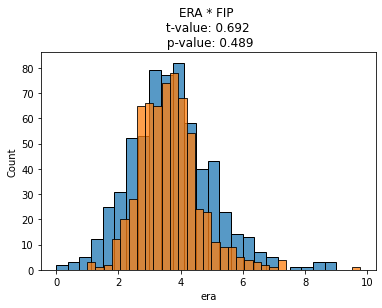

In [14]:
sns.histplot(era_df['era'])
sns.histplot(era_df['fip'])
plt.title(f'ERA * FIP \n t-value: {round(t[0], 3)} \n p-value: {round(t[-1], 3)}')
plt.show()

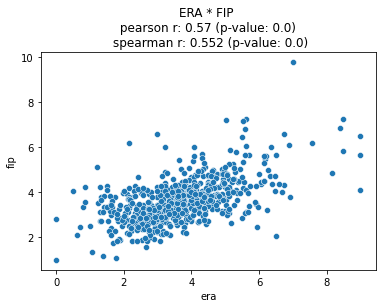

In [15]:
sns.scatterplot(data=era_df, x='era', y='fip')
plt.title(f'ERA * FIP \n pearson r: {round(r[0], 3)} (p-value: {round(r[-1], 3)}) \n spearman r: {round(sr[0], 3)} (p-value: {round(sr[-1], 3)})')
plt.show()

Now let's compile all the information we learned about today into one viz...

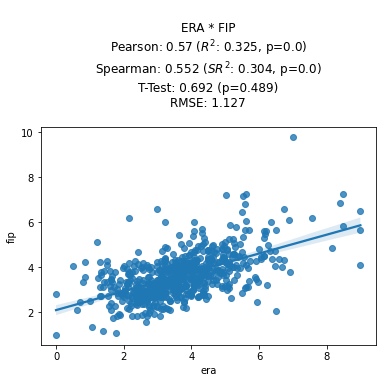

In [16]:
r = pearsonr(era_df['era'], era_df['fip'])
r2 = r[0] ** 2

sr = spearmanr(era_df['era'], era_df['fip'])
sr2 = sr[0] ** 2

t = ttest_ind(era_df['era'], era_df['fip'])

rmse = mean_squared_error(era_df['era'], era_df['fip']) ** 0.5

title_str = f"""
ERA * FIP
Pearson: {round(r[0], 3)} ($R^2$: {round(r2, 3)}, p={round(r[-1], 3)})
Spearman: {round(sr[0], 3)} ($SR^2$: {round(sr2, 3)}, p={round(sr[-1], 3)})
T-Test: {round(t[0], 3)} (p={round(t[-1], 3)})
RMSE: {round(rmse, 3)}
"""

sns.regplot(data=era_df, x='era', y='fip')
plt.title(title_str)
plt.show()

Here is some bonus content that will help when Day 6 rolls around...

What if we want to do all of this data creation and visualization later on.

**HOO BABY IT'S FUNCTION TIME!!!!**

We can write functions using the `def` keyword and then call the name of our function so that we don't have to do this over and over again. To show this off, let's create some datasets based off of our era data:

In [17]:
train = era_df.sample(100, random_state=1)
test = era_df.sample(100, random_state=2)

Now let's create that function to create the scatterplot for these datasets!

In [18]:
def make_corr(df):
    r = pearsonr(df['era'], df['fip'])
    r2 = r[0] ** 2

    sr = spearmanr(df['era'], df['fip'])
    sr2 = sr[0] ** 2

    t = ttest_ind(df['era'], df['fip'])

    rmse = mean_squared_error(df['era'], df['fip']) ** 0.5

    title_str = f"""
    ERA * FIP
    Pearson: {round(r[0], 3)} ($R^2$: {round(r2, 3)}, p={round(r[-1], 3)})
    Spearman: {round(sr[0], 3)} ($SR^2$: {round(sr2, 3)}, p={round(sr[-1], 3)})
    T-Test: {round(t[0], 3)} (p={round(t[-1], 3)})
    RMSE: {round(rmse, 3)}
    """

    sns.regplot(data=df, x='era', y='fip')
    plt.title(title_str)
    plt.show()

When you run the above cell... nothing happens because we have not called our function ey! SO LET'S CALL THAT FUNCTION BABYYYY

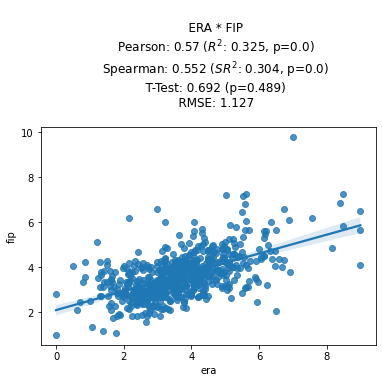

In [19]:
make_corr(era_df)

Well good thing we got the same graph from before! Let's do this with our new datasets:

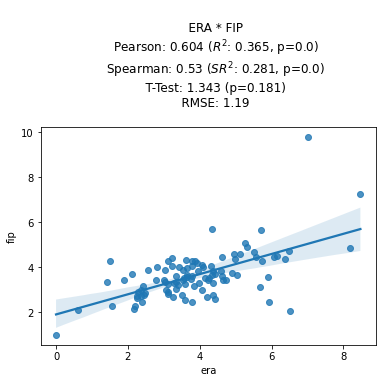

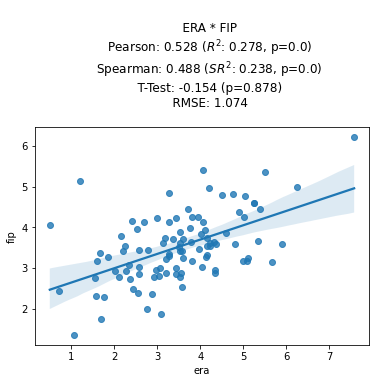

In [20]:
make_corr(train)
make_corr(test)

## HOMEWORK

1. Using the `era_df` dataframe, use correlation, central tendency, and/or academic stats (like t-test) to describe how strikeouts per 9 correlate to ERA.

In [30]:
r = pearsonr(era_df['era'], era_df['k9'])
r2 = r[0] ** 2

t = ttest_ind(era_df['era'], era_df['k9'])

output = f"""PEARSON R STATISTIC: {round(r[0], 3)}
R^2 STATISTIC: {round(r2, 3)}
P-VALUE: {round(r[-1], 3)}

T STATISTIC: {round(t[0], 3)}
P-VALUE: {round(t[-1], 3)}
"""

print(output)

PEARSON R STATISTIC: 0.013
R^2 STATISTIC: 0.0
P-VALUE: 0.746

T STATISTIC: -28.777
P-VALUE: 0.0



2. Wilcoxon Sign-Ranked Test is a non-parametric comparison test similar to Pearson R. IN stats module in `scipy` (aka `scipy.stats`) import `wilcoxon()` function to find the wilcoxon value when comparing ERA with FIP.

In [27]:
from scipy.stats import wilcoxon

w = wilcoxon(era_df['era'], era_df['fip'])
output = f"""WILCOXON STATISTIC: {round(w[0], 3)}
P-VALUE: {round(w[-1], 3)}
"""
print(output)

WILCOXON STATISTIC: 91217.5
P-VALUE: 0.184



3. The graphs we made with our `make_corr()` function do not have a way to identify what graph belongs to which dataset. Add a parameter in the function to insert a string into the title. 

> HINT: This uses f-strings! Insert a string into the graph title

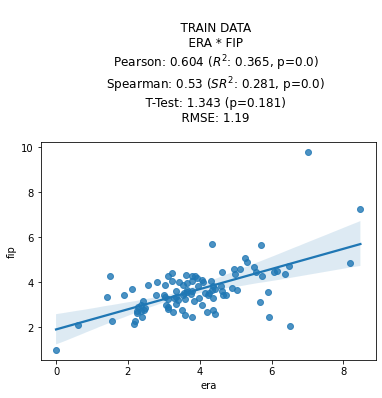

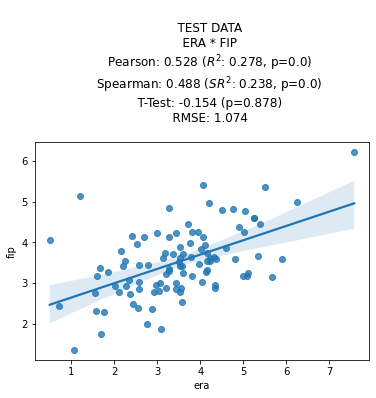

In [29]:
def make_corr(df, title_str):
    r = pearsonr(df['era'], df['fip'])
    r2 = r[0] ** 2

    sr = spearmanr(df['era'], df['fip'])
    sr2 = sr[0] ** 2

    t = ttest_ind(df['era'], df['fip'])

    rmse = mean_squared_error(df['era'], df['fip']) ** 0.5

    title_str = f"""
    {title_str}
    ERA * FIP
    Pearson: {round(r[0], 3)} ($R^2$: {round(r2, 3)}, p={round(r[-1], 3)})
    Spearman: {round(sr[0], 3)} ($SR^2$: {round(sr2, 3)}, p={round(sr[-1], 3)})
    T-Test: {round(t[0], 3)} (p={round(t[-1], 3)})
    RMSE: {round(rmse, 3)}
    """

    sns.regplot(data=df, x='era', y='fip')
    plt.title(title_str)
    plt.show()

make_corr(train, 'TRAIN DATA')
make_corr(test, 'TEST DATA')

In [32]:
# write all updates to our datasets back out for use in Day 6
era_df.to_csv('./data/era.csv', index=False)
df.to_csv('./data/2023-nwbc-data.csv', index=False)